In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
#from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from scipy import stats

In [4]:
df = pd.read_csv("GOGL.csv")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = pd.to_datetime(df["Date"].dt.strftime('%Y/%m%/d%'))
df['Close'] = pd.to_numeric(df['Close'].replace(',', ''), errors='coerce')
df.set_index('Date')


Open    High     Low    Close  Adj Close  Volume
Date                                                          
2000-07-27  95.000  96.250  93.125  93.7500  15.339723    9000
2000-07-28  95.000  95.000  91.875  93.4375  15.288588    3000
2000-07-31  93.750  94.375  92.500  93.7500  15.339723   22000
2000-08-01  92.500  94.375  91.875  93.7500  15.339723   13100
2000-08-02  94.375  95.625  93.125  95.0000  15.544250    3000
...            ...     ...     ...      ...        ...     ...
2020-08-20   4.150   4.160   4.100   4.1500   4.150000  204600
2020-08-21   4.050   4.080   4.010   4.0600   4.060000  223800
2020-08-24   4.160   4.210   4.120   4.1900   4.190000  252800
2020-08-25   4.240   4.270   4.160   4.2200   4.220000  143600
2020-08-26   4.190   4.240   4.160   4.2000   4.200000  133800

[5053 rows x 6 columns]

In [10]:
from scipy import stats
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

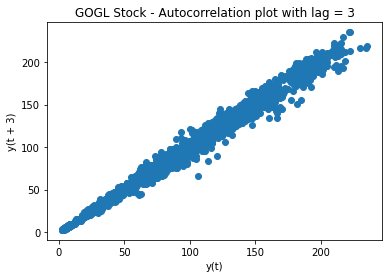

In [9]:
#Checking for autocorralation
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('GOGL Stock - Autocorrelation plot with lag = 3')
plt.show()

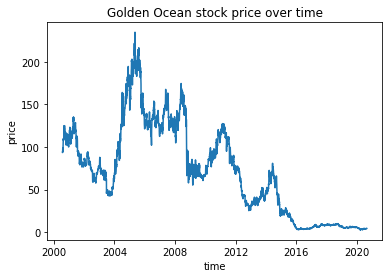

In [10]:
plt.plot(df["Date"], df["Close"])
plt.title("Golden Ocean stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [11]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 0.38604680342257836


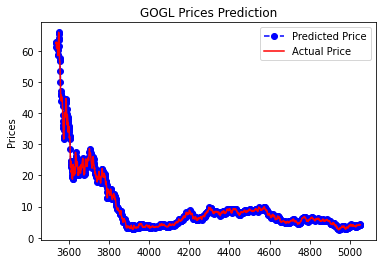

In [15]:
#Vizualising predictions
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('GOGL Prices Prediction')
#plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()